KMeans Clustering 

Importing Libraries


In [103]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import logging
from logging import debug, info, collections
import random
from collections import defaultdict

import math

Citation and Database Description
    
    
    https://www.kaggle.com/dorbicycle/world-foodfeed-production
    
    the database is about distribution of food production and consuption across the globe and how we can cluster countries 
    togethert based on food they produced 
    

Importing dataset 

In [104]:
df=pd.read_csv("FAO.csv",  encoding = "ISO-8859-1")
pd.options.mode.chained_assignment = None

In [105]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


Now we do  EDA

In [106]:
df1 = df.iloc[:,10:]

In [107]:
df1.head()


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [108]:
#we calculate mean here
df1['mean'] = df1.mean(axis=1)

In [109]:
df['mean'] = df1.mean(axis=1)

In [110]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,288.339623
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,97.924528
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,160.924528
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,178.320755


<AxesSubplot:xlabel='Area'>

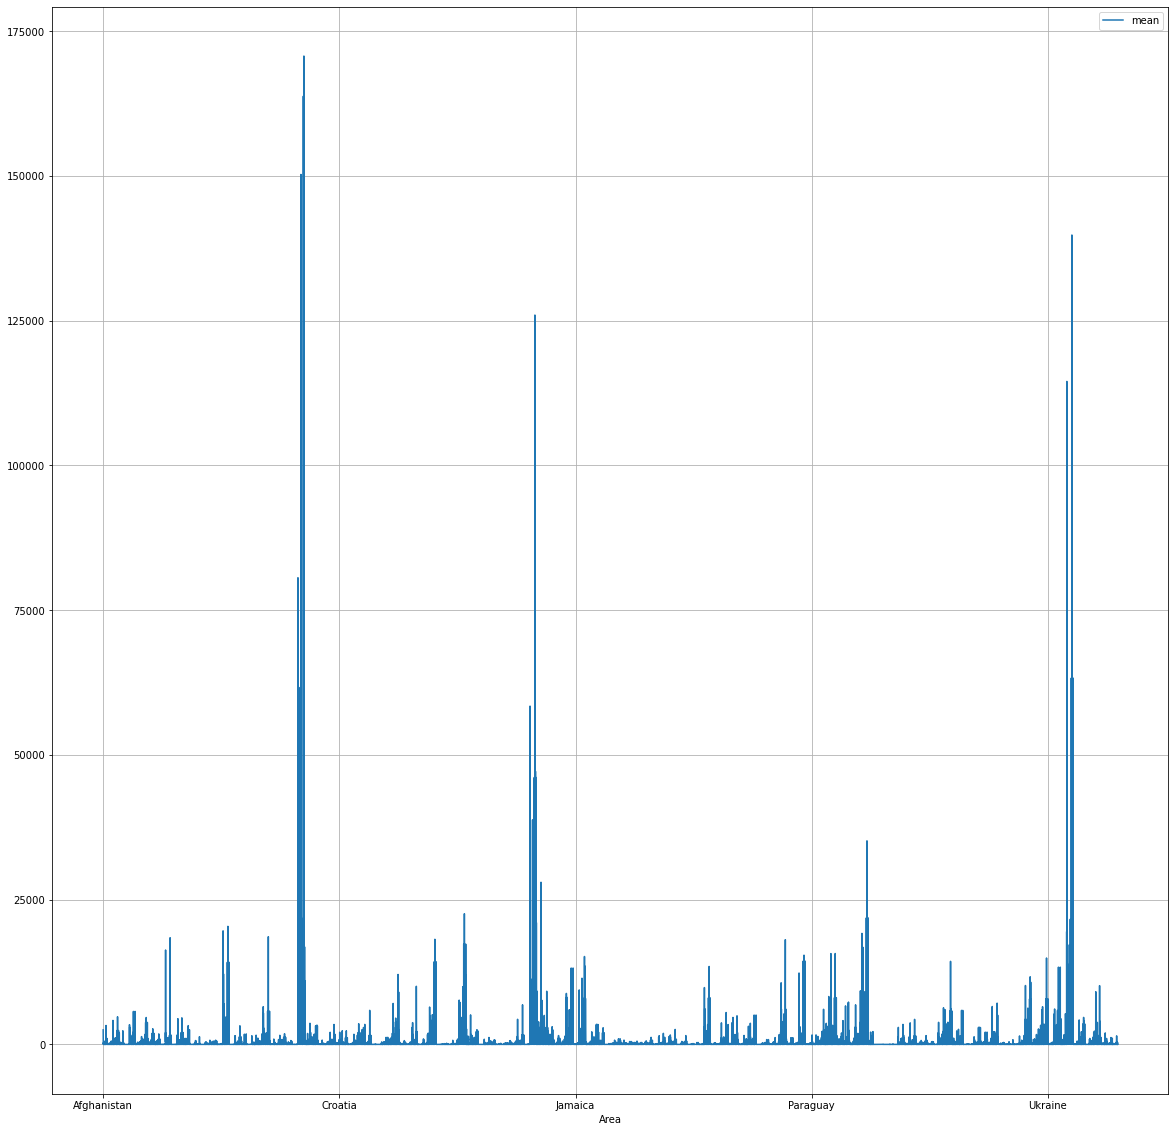

In [111]:
#we plot graph to show countries who both produce and consume product 
df.plot(x='Area', y='mean' ,figsize=(20,20), grid=True)

In [112]:
#dataset contain more than 110 countries so for better representation we find mean for all year produce 
df2=df.nlargest(20, ['mean']) 

In [113]:
df2.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
4249,CHN,41,"China, mainland",2918,Vegetables,5142,Food,1000 tonnes,35.86,104.20,...,373694.0,388100.0,402975.0,425537.0,434724.0,451838.0,462696.0,479028,489299,170690.452830
4237,CHN,41,"China, mainland",2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,35.86,104.20,...,202337.0,202349.0,200735.0,203218.0,201290.0,204167.0,208701.0,207802,209038,163752.188679
4186,CHN,41,"China, mainland",2605,"Vegetables, Other",5142,Food,1000 tonnes,35.86,104.20,...,330278.0,343450.0,355019.0,373622.0,377460.0,393516.0,402338.0,419262,426850,150235.811321
20506,USA,231,United States of America,2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,37.09,-95.71,...,166631.0,150006.0,156304.0,146098.0,141625.0,131633.0,124808.0,125012,140096,139783.094340
9139,IND,100,India,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,20.59,78.96,...,167463.0,172010.0,177260.0,181605.0,179175.0,184552.0,184648.0,181267,185884,125959.754717


In [114]:
# we remove feed portion from our dataset
df3 = df2[df.Element != 'Feed']


<ipython-input-114-30660c351cca>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df.Element != 'Feed']


In [115]:
df3.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
4249,CHN,41,"China, mainland",2918,Vegetables,5142,Food,1000 tonnes,35.86,104.20,...,373694.0,388100.0,402975.0,425537.0,434724.0,451838.0,462696.0,479028,489299,170690.452830
4237,CHN,41,"China, mainland",2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,35.86,104.20,...,202337.0,202349.0,200735.0,203218.0,201290.0,204167.0,208701.0,207802,209038,163752.188679
4186,CHN,41,"China, mainland",2605,"Vegetables, Other",5142,Food,1000 tonnes,35.86,104.20,...,330278.0,343450.0,355019.0,373622.0,377460.0,393516.0,402338.0,419262,426850,150235.811321
9139,IND,100,India,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,20.59,78.96,...,167463.0,172010.0,177260.0,181605.0,179175.0,184552.0,184648.0,181267,185884,125959.754717
4239,CHN,41,"China, mainland",2907,Starchy Roots,5142,Food,1000 tonnes,35.86,104.20,...,105309.0,85157.0,86491.0,92753.0,90151.0,93641.0,94671.0,94969,95208,87244.867925


<AxesSubplot:xlabel='Area'>

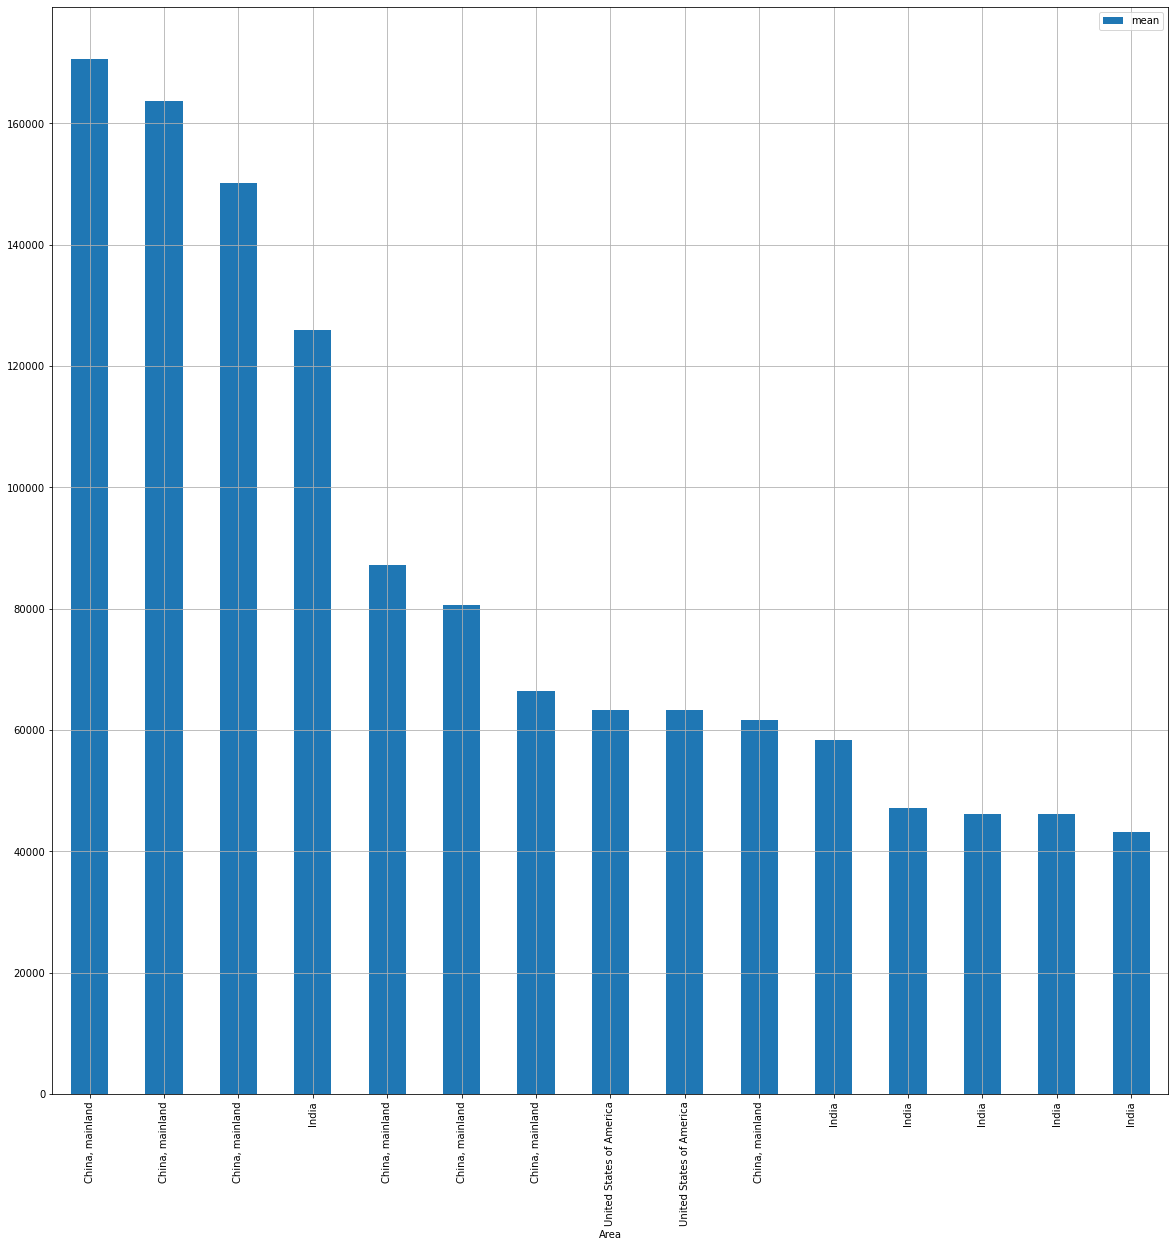

In [116]:
# we arange top countries based on food production
df3.plot.bar(x='Area', y='mean' ,figsize=(20,20), grid=True)

In [117]:
df4 = df2[df.Element != 'Food']

<ipython-input-117-8f566a211c65>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df2[df.Element != 'Food']


In [118]:
df4.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
20506,USA,231,United States of America,2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,37.09,-95.71,...,166631.0,150006.0,156304.0,146098.0,141625.0,131633.0,124808.0,125012,140096,139783.094340
20399,USA,231,United States of America,2514,Maize and products,5521,Feed,1000 tonnes,37.09,-95.71,...,155323.0,140719.0,148787.0,131619.0,130193.0,121902.0,115739.0,109607,128024,114492.924528
4236,CHN,41,"China, mainland",2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,35.86,104.20,...,110316.0,111576.0,115518.0,126518.0,131336.0,143443.0,166554.0,181259,193043,77070.056604
4126,CHN,41,"China, mainland",2514,Maize and products,5521,Feed,1000 tonnes,35.86,104.20,...,94500.0,92500.0,95500.0,106000.0,105600.0,114500.0,125000.0,140000,150000,60690.716981
4238,CHN,41,"China, mainland",2907,Starchy Roots,5521,Feed,1000 tonnes,35.86,104.20,...,64115.0,55263.0,56029.0,49983.0,64000.0,65475.0,69210.0,75446,78401,47778.754717


<AxesSubplot:xlabel='Area'>

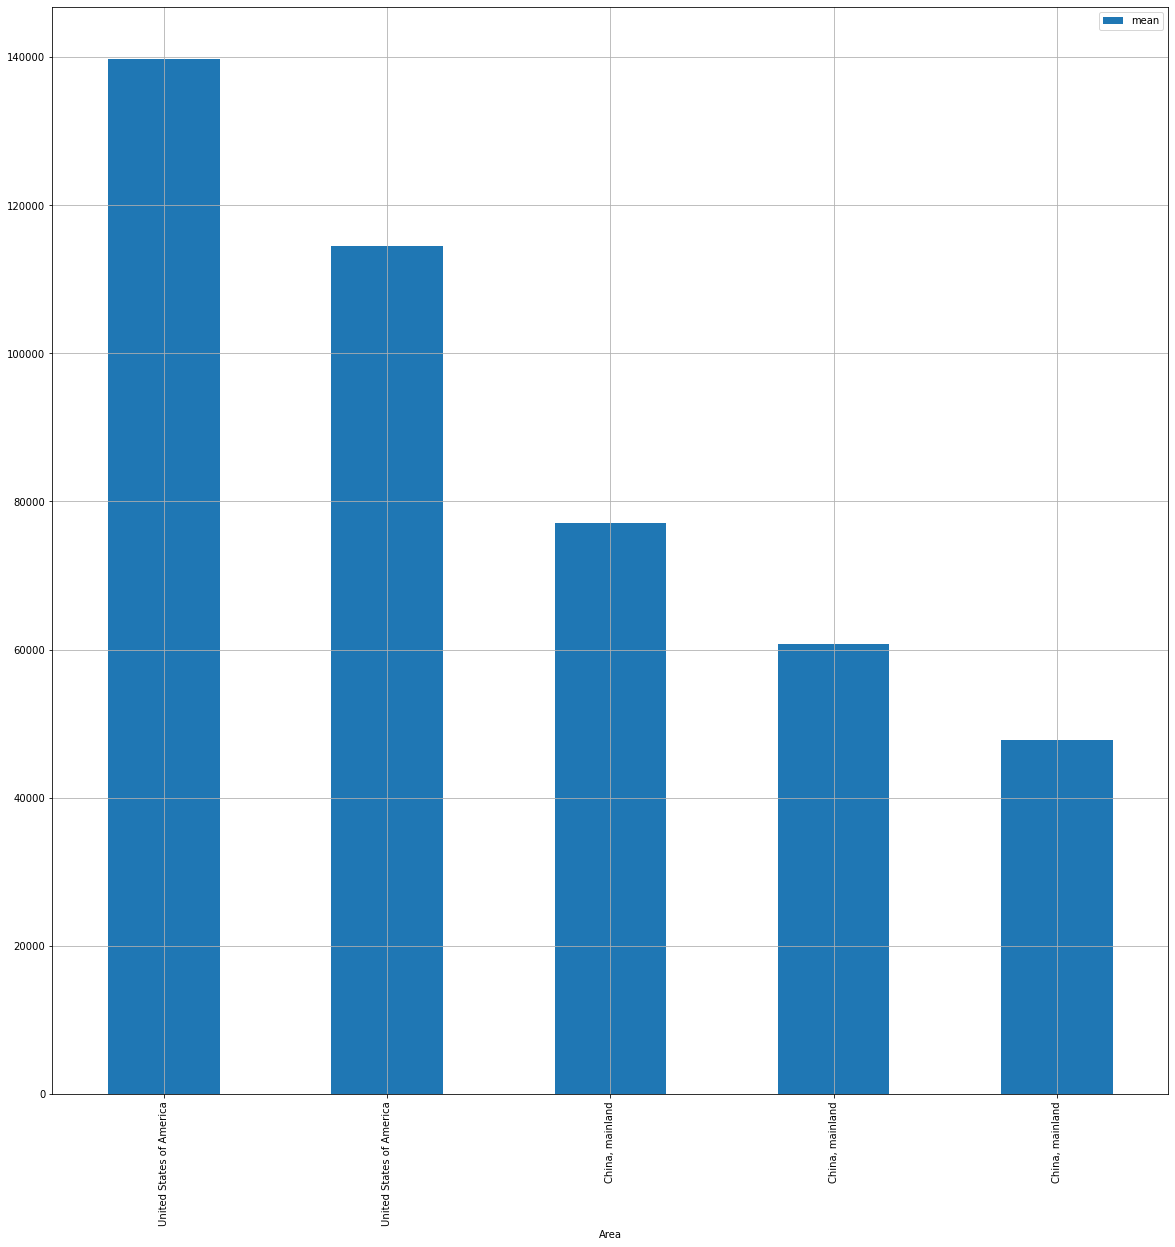

In [119]:
#now we have arrange countries based on food consuption 
df4.plot.bar(x='Area', y='mean' ,figsize=(20,20), grid=True)

<AxesSubplot:>

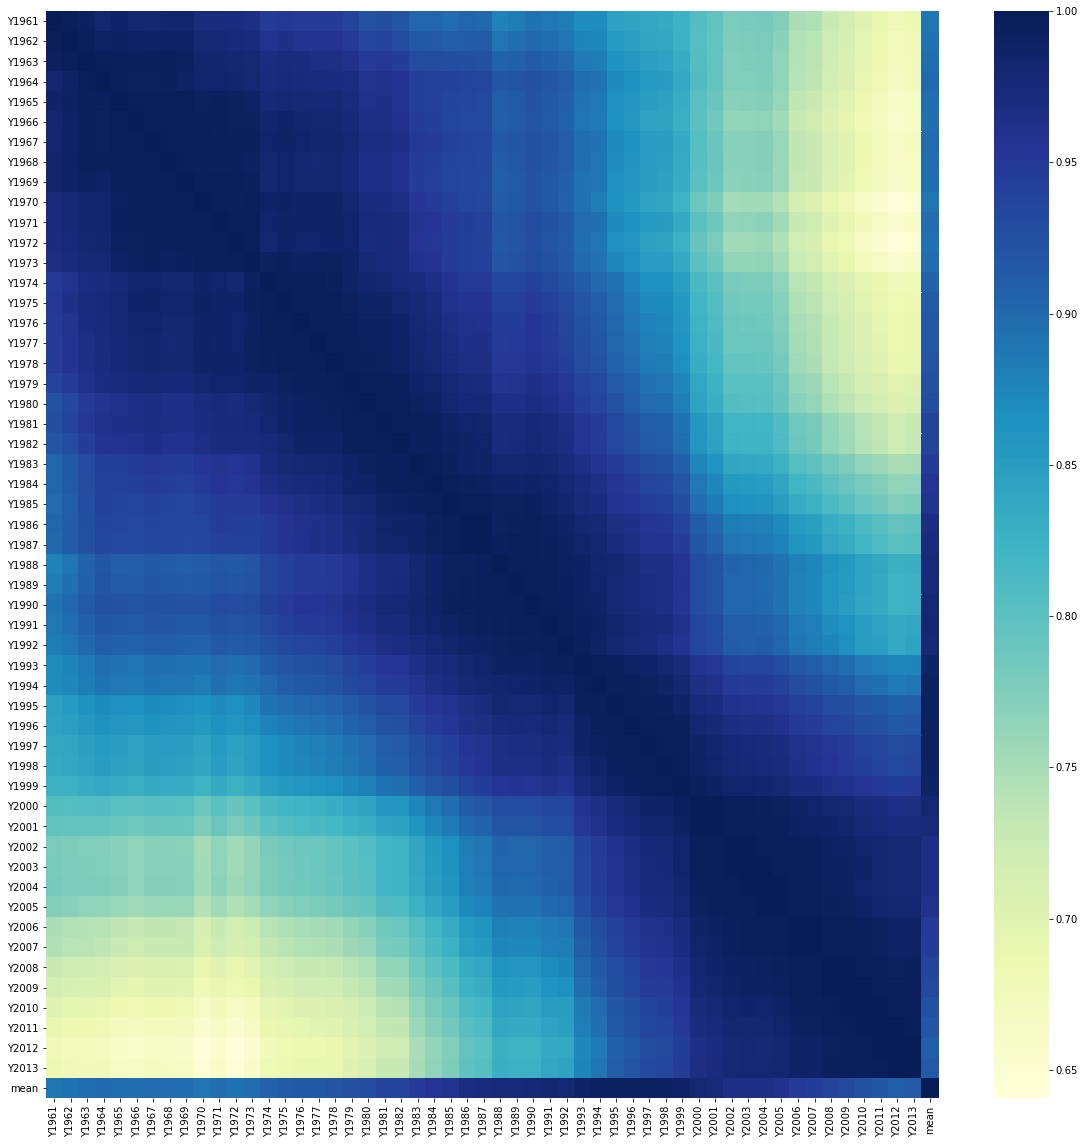

In [120]:
# correlation
year_corr = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(year_corr.corr(),cmap="YlGnBu", ax=ax)


Data PreProcessing

In [121]:
# we get area in our df1
df1.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
0,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736
1,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,288.339623
2,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,97.924528
3,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,160.924528
4,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,178.320755


In [122]:
#now we get area from df to df1
df1['Area'] = df.Area
df1['Element'] = df.Element

In [123]:
df1.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean,Area,Element
0,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,...,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736,Afghanistan,Food
1,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,...,455.0,490.0,415.0,442.0,476.0,425,422,288.339623,Afghanistan,Food
2,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,...,263.0,230.0,379.0,315.0,203.0,367,360,97.924528,Afghanistan,Feed
3,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,...,48.0,62.0,55.0,60.0,72.0,78,89,160.924528,Afghanistan,Food
4,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,...,249.0,247.0,195.0,178.0,191.0,200,200,178.320755,Afghanistan,Feed


In [124]:
# now we drop all feed since we want countries cluster by production 
df_new = df1[df1.Element != 'Feed']

In [125]:
df_new.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean,Area,Element
0,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,...,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736,Afghanistan,Food
1,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,...,455.0,490.0,415.0,442.0,476.0,425,422,288.339623,Afghanistan,Food
3,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,...,48.0,62.0,55.0,60.0,72.0,78,89,160.924528,Afghanistan,Food
5,403.0,403.0,410.0,415.0,415.0,413.0,454.0,448.0,455.0,383.0,...,67.0,69.0,71.0,82.0,73.0,77,76,287.094340,Afghanistan,Food
6,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,...,19.0,21.0,18.0,14.0,14.0,14,12,22.264151,Afghanistan,Food


In [126]:
#now we drop element column
df_new2=df_new.drop(['Element'], axis =1)
df_new2.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean,Area
0,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,...,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736,Afghanistan
1,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,...,546.0,455.0,490.0,415.0,442.0,476.0,425,422,288.339623,Afghanistan
3,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,...,44.0,48.0,62.0,55.0,60.0,72.0,78,89,160.924528,Afghanistan
5,403.0,403.0,410.0,415.0,415.0,413.0,454.0,448.0,455.0,383.0,...,82.0,67.0,69.0,71.0,82.0,73.0,77,76,287.094340,Afghanistan
6,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,...,11.0,19.0,21.0,18.0,14.0,14.0,14,12,22.264151,Afghanistan


In [127]:
#arranging data in representable format
df_new3=df_new2.drop(['Area'], axis =1)

In [128]:
df_new3.insert(loc = 0, column = 'Area', value = df.Area)


In [129]:
df_new3.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
0,Afghanistan,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736
1,Afghanistan,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,288.339623
3,Afghanistan,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,160.924528
5,Afghanistan,403.0,403.0,410.0,415.0,415.0,413.0,454.0,448.0,455.0,...,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76,287.094340
6,Afghanistan,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12,22.264151


In [130]:
# now we remove null values 
df_new3.head()
df_new3.dropna()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean
0,Afghanistan,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2508.037736
1,Afghanistan,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,288.339623
3,Afghanistan,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,160.924528
5,Afghanistan,403.0,403.0,410.0,415.0,415.0,413.0,454.0,448.0,455.0,...,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76,287.094340
6,Afghanistan,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12,22.264151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21470,Zimbabwe,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24,25,12.301887
21472,Zimbabwe,230.0,232.0,234.0,238.0,234.0,231.0,231.0,248.0,264.0,...,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451,344.094340
21474,Zimbabwe,6.0,6.0,6.0,8.0,9.0,10.0,10.0,10.0,10.0,...,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40,18.811321
21475,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000


In [131]:
# now we sort rank as it as we want to arrange it with consuption within out dataset 
df_new3["Rank"] = df_new2["mean"].rank() 
  
df_new3.sort_values("Rank", inplace = True, ascending=False) 

In [132]:
df_new3.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,mean,Rank
4249,"China, mainland",52968.0,49318.0,43635.0,39097.0,41449.0,40808.0,41524.0,43742.0,45077.0,...,388100.0,402975.0,425537.0,434724.0,451838.0,462696.0,479028,489299,170690.452830,17528.0
4237,"China, mainland",59256.0,66145.0,74029.0,81048.0,88579.0,93392.0,93557.0,93501.0,93301.0,...,202349.0,200735.0,203218.0,201290.0,204167.0,208701.0,207802,209038,163752.188679,17527.0
4186,"China, mainland",44728.0,41160.0,36386.0,32669.0,34685.0,34236.0,34854.0,36717.0,37728.0,...,343450.0,355019.0,373622.0,377460.0,393516.0,402338.0,419262,426850,150235.811321,17526.0
9139,India,63431.0,68508.0,66208.0,70097.0,66185.0,70573.0,77541.0,77619.0,80419.0,...,172010.0,177260.0,181605.0,179175.0,184552.0,184648.0,181267,185884,125959.754717,17525.0
4239,"China, mainland",74071.0,75097.0,66180.0,58955.0,75697.0,85502.0,84238.0,83039.0,90687.0,...,85157.0,86491.0,92753.0,90151.0,93641.0,94671.0,94969,95208,87244.867925,17524.0


In [133]:
normalized_df=(df_new3-df_new3.mean())/df_new3.std()

In [134]:
#here we select rank and mean column for k means clustering 
X = normalized_df.iloc[:,-2:].values
X = pd.DataFrame(X)

KMeans Clustering without using libraries

In [135]:
# we convert our dataset to array to reduce errors
x = np.array(X)

In [136]:
x

array([[76.93879995, 54.90785497],
       [32.81957357, 52.67155369],
       [67.1079581 , 48.3150329 ],
       ...,
       [-0.08759098, -0.10810726],
       [-0.08759098, -0.10810726],
       [-0.08759098, -0.10810726]])

In [137]:
#importing random and getting assumedcenteroids 
import random
init_assumedcenteroids = random.sample(range(0, len(normalized_df)), 5)
init_assumedcenteroids

[4058, 2252, 4215, 7314, 3371]

In [138]:
#appending to get proper assumedcenteroids
assumedcenteroids = []
for i in init_assumedcenteroids:
    assumedcenteroids.append(X.loc[i])
assumedcenteroids

[0   -0.071691
 1   -0.086318
 Name: 4058, dtype: float64,
 0   -0.002741
 1   -0.029463
 Name: 2252, dtype: float64,
 0   -0.068700
 1   -0.088629
 Name: 4215, dtype: float64,
 0   -0.085702
 1   -0.104404
 Name: 7314, dtype: float64,
 0   -0.053903
 1   -0.074964
 Name: 3371, dtype: float64]

In [139]:
#converting assumedcenteroid to array
assumedcenteroids = np.array(assumedcenteroids)

In [140]:
#calculating sepration
def calc_sepration(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [141]:
#findnearestcentroid
def findnearestcentroid(ic, x):
    assigned_assumedcenteroid = []
    for i in x:
        sepration=[]
        for j in ic:
            sepration.append(calc_sepration(i, j))
        assigned_assumedcenteroid.append(np.argmin(sepration))
    return assigned_assumedcenteroid

In [142]:
# finding assumedcenteroids
acquire_assumedcenteroids = findClosestCentroids(assumedcenteroids, x)
acquire_assumedcenteroids

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [143]:
# finding new assumedcenteroids
def calc_assumedcenteroids(clusters, x):
    new_assumedcenteroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_assumedcenteroids.append(cluster_mean)
    return new_assumedcenteroids

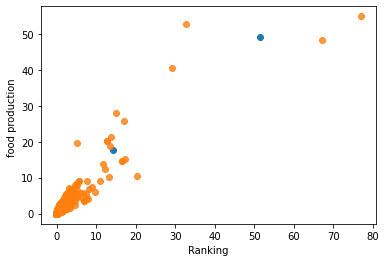

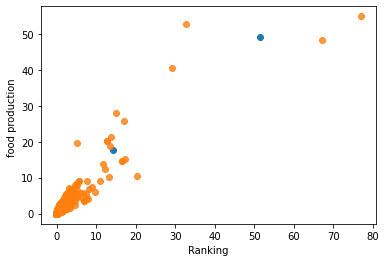

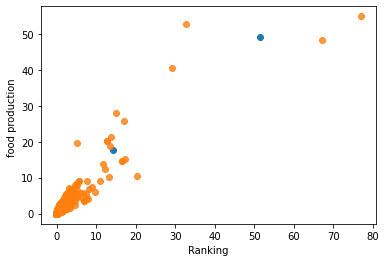

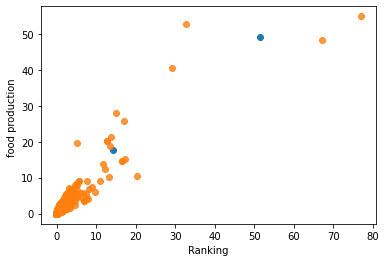

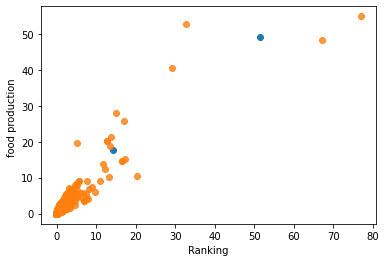

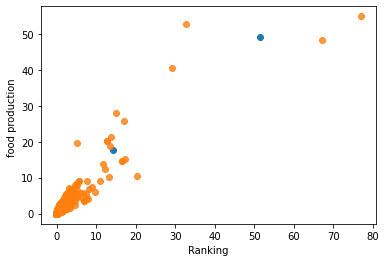

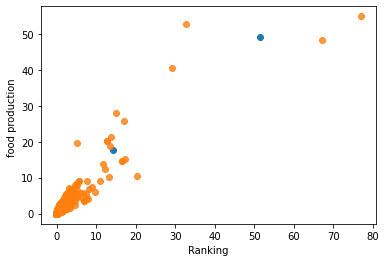

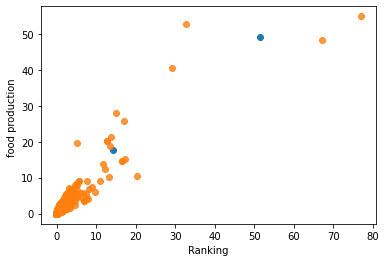

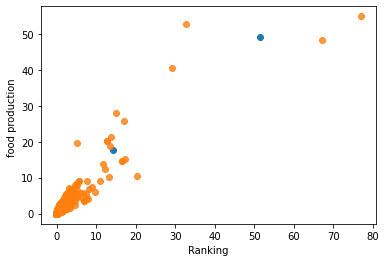

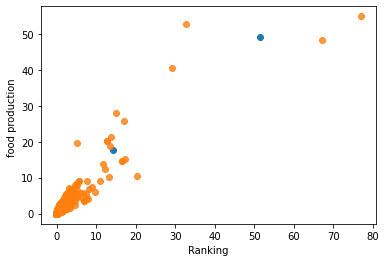

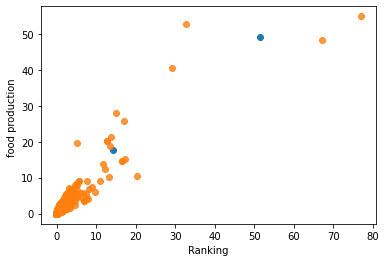

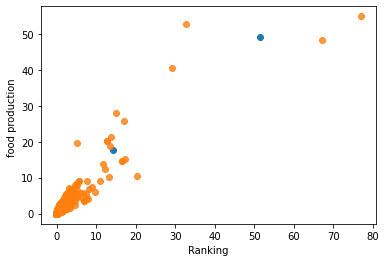

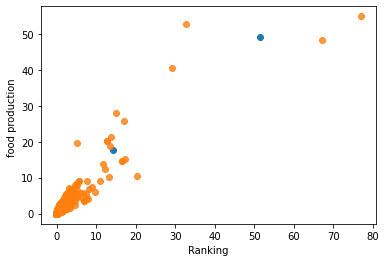

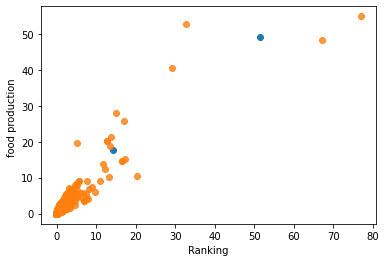

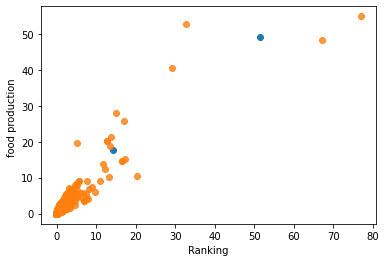

In [149]:
#visualising Centroids in diffrent iteration 
for i in range(15):
    acquire_assumedcenteroids = findClosestCentroids(assumedcenteroids, x)
    assumedcenteroids = calc_assumedcenteroids(acquire_assumedcenteroids, x)
    #printing(assumedcenteroids)
    plt.figure()
    plt.scatter(np.array(assumedcenteroids)[:, 0], np.array(assumedcenteroids)[:, 1], cmap = "PuOr")
    plt.scatter(x[:, 0], x[:, 1], alpha=0.8)
    plt.xlabel('Ranking')
    plt.ylabel('food production ')
    plt.show()
    plt.show()

Conclusions
    
    We can see in given data Chinese products and indian products 
    have max no. of food production hence our assumedcenteroid is formed 
    near them and rest of the countries has very low productions 

Citiations 
    

In [145]:
rf=pd.read_csv("refer.csv")

In [146]:
rf

,Task,Refrence
0,"python - Getting TypeError: '(slice(None, None...",https://stackoverflow.com/questions/55291667/g...
1,"(slice(None, None, None), 0)' is an invalid ke...",https://www.google.com/search?q=(slice(None%2C...
2,"(slice(None, None, None), 0)' is an invalid ke...",https://www.google.com/search?q=(slice(None%2C...
3,A Complete K Mean Clustering Algorithm From Sc...,https://towardsdatascience.com/a-complete-k-me...
4,k mean clustering from scratch on dataset - Go...,https://www.google.com/search?q=k+mean+cluster...
5,k mean clustering from scratch on dataset - Go...,https://www.google.com/search?q=k+mean+cluster...
6,python - Data-frame Object has no Attribute - ...,https://stackoverflow.com/questions/38134643/d...
7,'DataFrame' object has no attribute 'convert_o...,https://www.google.com/search?q=%27DataFrame%2...
8,df.convert_objects removed from pandas · Issue...,https://github.com/labscript-suite/lyse/issues/52
9,'DataFrame' object has no attribute 'convert_o...,https://www.google.com/search?q=%27DataFrame%2...


links
https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
https://www.google.com/search?q=(slice(None%2C+None%2C+None)%2C+0)%27+is+an+invalid+key&rlz=1C1RXQR_enUS937US937&oq=(slice(None%2C+None%2C+None)%2C+0)%27+is+an+invalid+key&aqs=chrome..69i57j0l3j0i10i22i30j0i22i30.668j0j7&sourceid=chrome&ie=UTF-8
https://www.google.com/search?q=(slice(None%2C+None%2C+None)%2C+0)%27+is+an+invalid+key&rlz=1C1RXQR_enUS937US937&oq=(slice(None%2C+None%2C+None)%2C+0)%27+is+an+invalid+key&aqs=chrome..69i57j0l3j0i10i22i30j0i22i30.668j0j7&sourceid=chrome&ie=UTF-8
https://towardsdatascience.com/a-complete-k-mean-clustering-algorithm-from-scratch-in-python-step-by-step-guide-1eb05cdcd461
https://www.google.com/search?q=k+mean+clustering+from+scratch+on+dtaset&rlz=1C1RXQR_enUS937US937&oq=k+mean+clustering+from+scratch+on+dtaset&aqs=chrome..69i57j69i64l3.14417j0j4&sourceid=chrome&ie=UTF-8
https://www.google.com/search?q=k+mean+clustering+from+scratch+on+dtaset&rlz=1C1RXQR_enUS937US937&oq=k+mean+clustering+from+scratch+on+dtaset&aqs=chrome..69i57j69i64l3.14417j0j4&sourceid=chrome&ie=UTF-8
https://stackoverflow.com/questions/38134643/data-frame-object-has-no-attribute
https://www.google.com/search?q=%27DataFrame%27+object+has+no+attribute+%27convert_objects%27&rlz=1C1RXQR_enUS937US937&oq=%27DataFrame%27+object+has+no+attribute+%27convert_objects%27&aqs=chrome.0.69i59j0j0i22i30l5.627j0j7&sourceid=chrome&ie=UTF-8
https://github.com/labscript-suite/lyse/issues/52
https://www.google.com/search?q=%27DataFrame%27+object+has+no+attribute+%27convert_objects%27&rlz=1C1RXQR_enUS937US937&oq=%27DataFrame%27+object+has+no+attribute+%27convert_objects%27&aqs=chrome.0.69i59j0j0i22i30l5.627j0j7&sourceid=chrome&ie=UTF-8
https://www.google.com/search?q=%27DataFrame%27+object+has+no+attribute+%27convert_objects%27&rlz=1C1RXQR_enUS937US937&oq=%27DataFrame%27+object+has+no+attribute+%27convert_objects%27&aqs=chrome.0.69i59j0j0i22i30l5.627j0j7&sourceid=chrome&ie=UTF-8
https://pythonexamples.org/python-nameerror-name-logging-is-not-defined/
https://www.google.com/search?q=name+%27logging%27+is+not+defined&rlz=1C1RXQR_enUS937US937&oq=name+%27logging%27+is+not+defined&aqs=chrome..69i57j0i22i30l7.665j0j7&sourceid=chrome&ie=UTF-8
https://www.google.com/search?q=name+%27logging%27+is+not+defined&rlz=1C1RXQR_enUS937US937&oq=name+%27logging%27+is+not+defined&aqs=chrome..69i57j0i22i30l7.665j0j7&sourceid=chrome&ie=UTF-8
https://www.google.com/search?rlz=1C1RXQR_enUS937US937&sxsrf=ALeKk00owQv6cB0feJghgodhmGhr1uR6YQ%3A1615164980362&ei=NHZFYLbPFce-ggeliYHQCA&q=array%28%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D%29%2C+0%29++kmeans&oq=array%28%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D%29%2C+0%29++kmeans&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BggAEBYQHjoFCCEQqwJQxxdYvSxguTBoAXACeACAAXuIAcAGkgEDNy4ymAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwi2uaG3vp_vAhVHn-AKHaVEAIoQ4dUDCA4&uact=5
https://stackoverflow.com/questions/56496692/typeerror-help-plt-scatter-reading-my-csv-as-true-false-rather-than-numerical
https://www.google.com/search?rlz=1C1RXQR_enUS937US937&sxsrf=ALeKk00owQv6cB0feJghgodhmGhr1uR6YQ%3A1615164980362&ei=NHZFYLbPFce-ggeliYHQCA&q=array%28%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D%29%2C+0%29++kmeans&oq=array%28%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D%29%2C+0%29++kmeans&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BggAEBYQHjoFCCEQqwJQxxdYvSxguTBoAXACeACAAXuIAcAGkgEDNy4ymAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwi2uaG3vp_vAhVHn-AKHaVEAIoQ4dUDCA4&uact=5
https://www.google.com/search?rlz=1C1RXQR_enUS937US937&sxsrf=ALeKk00owQv6cB0feJghgodhmGhr1uR6YQ%3A1615164980362&ei=NHZFYLbPFce-ggeliYHQCA&q=array%28%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D%29%2C+0%29++kmeans&oq=array%28%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D%29%2C+0%29++kmeans&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BggAEBYQHjoFCCEQqwJQxxdYvSxguTBoAXACeACAAXuIAcAGkgEDNy4ymAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwi2uaG3vp_vAhVHn-AKHaVEAIoQ4dUDCA4&uact=5
https://www.google.com/search?q=array(%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D)%2C+0)&rlz=1C1RXQR_enUS937US937&oq=array(%5BFalse%2C+False%2C+False%2C+...%2C++True%2C++True%2C++True%5D)%2C+0)&aqs=chrome..69i57j0i22i30.675j0j7&sourceid=chrome&ie=UTF-8
https://stackoverflow.com/questions/56496692/typeerror-help-plt-scatter-reading-my-csv-as-true-false-rather-than-numerical
https://www.google.com/search?q=array(%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D)%2C+0)&rlz=1C1RXQR_enUS937US937&oq=array(%5BFalse%2C+False%2C+False%2C+...%2C++True%2C++True%2C++True%5D)%2C+0)&aqs=chrome..69i57j0i22i30.675j0j7&sourceid=chrome&ie=UTF-8
https://www.google.com/search?q=array(%5BFalse%2C+False%2C+False%2C+...%2C+True%2C+True%2C+True%5D)%2C+0)&rlz=1C1RXQR_enUS937US937&oq=array(%5BFalse%2C+False%2C+False%2C+...%2C++True%2C++True%2C++True%5D)%2C+0)&aqs=chrome..69i57j0i22i30.675j0j7&sourceid=chrome&ie=UTF-8
https://colab.research.google.com/drive/1uYlxQguyJ4EvydQCN8RyLNs1F0zPC1wV#scrollTo=d0ZYecccMHNx
https://colab.research.google.com/drive/1uYlxQguyJ4EvydQCN8RyLNs1F0zPC1wV#scrollTo=cjEfU6ZSMAPl
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
https://www.google.com/search?rlz=1C1RXQR_enUS937US937&sxsrf=ALeKk00w181B-h2A9bFx-lgsfHTiYLPuzw%3A1615164740370&ei=RHVFYMWQFumg_QbmnbuwDw&q=sort+in+decending+order+pandas&oq=sort+in+decending+order+pandas&gs_lcp=Cgdnd3Mtd2l6EAMyBAgAEA0yBggAEBYQHjoHCAAQRxCwAzoHCCMQsAIQJzoHCCMQsQIQJzoECAAQCjoICAAQFhAKEB5QtxVYrypgnytoAXABeACAAY4BiAGNC5IBBDEzLjKYAQCgAQGqAQdnd3Mtd2l6yAEIwAEB&sclient=gws-wiz&ved=0ahUKEwjFwunEvZ_vAhVpUN8KHebODvYQ4dUDCA4&uact=5
https://www.google.com/search?rlz=1C1RXQR_enUS937US937&sxsrf=ALeKk00w181B-h2A9bFx-lgsfHTiYLPuzw%3A1615164740370&ei=RHVFYMWQFumg_QbmnbuwDw&q=sort+in+decending+order+pandas&oq=sort+in+decending+order+pandas&gs_lcp=Cgdnd3Mtd2l6EAMyBAgAEA0yBggAEBYQHjoHCAAQRxCwAzoHCCMQsAIQJzoHCCMQsQIQJzoECAAQCjoICAAQFhAKEB5QtxVYrypgnytoAXABeACAAY4BiAGNC5IBBDEzLjKYAQCgAQGqAQdnd3Mtd2l6yAEIwAEB&sclient=gws-wiz&ved=0ahUKEwjFwunEvZ_vAhVpUN8KHebODvYQ4dUDCA4&uact=5
